# Hyperparameter Tuning of Random Forest  using ABC Algorithm 

### Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE #for balancing the dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

### Reading the data

In [2]:
#loading Data
file_path = r"c:\Users\w\Desktop\ML college tasks\Data sets\Task 1 Data set.csv"
df_stroke=pd.read_csv(file_path)

In [3]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# preprocessing

In [4]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df_stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df_stroke.shape

(5110, 12)

In [8]:
#dropping the id column no use in the analysis and the modeling
df_stroke.drop('id', axis=1, inplace=True)

In [9]:
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
#identify the missing values
df_stroke.isnull().sum().sort_values(ascending = False)

bmi                  201
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

In [11]:
#replacing the missing values with NaN
df_stroke.replace("?", np.nan, inplace = True)

#replacing the missing values with the mean of the column
avg_bmi= df_stroke["bmi"].astype("float").mean(axis=0)
df_stroke["bmi"].replace(np.nan, avg_bmi, inplace=True)

C:\Users\w\AppData\Local\Temp\ipykernel_6268\4007661695.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_stroke["bmi"].replace(np.nan, avg_bmi, inplace=True)


In [12]:
df_stroke.isnull().sum().sort_values(ascending = False)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Data visualization

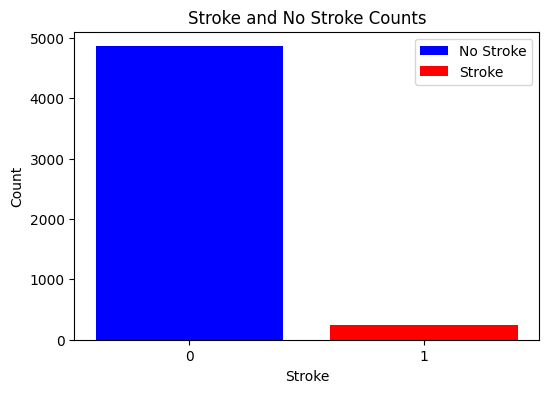

In [13]:
# bar plot for showing the stroke counts
stroke_counts = df_stroke['stroke'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(stroke_counts.index.astype(str), stroke_counts.values,color=['blue', 'red'], label=['No Stroke', 'Stroke'])
plt.title('Stroke and No Stroke Counts')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.legend()
plt.show()

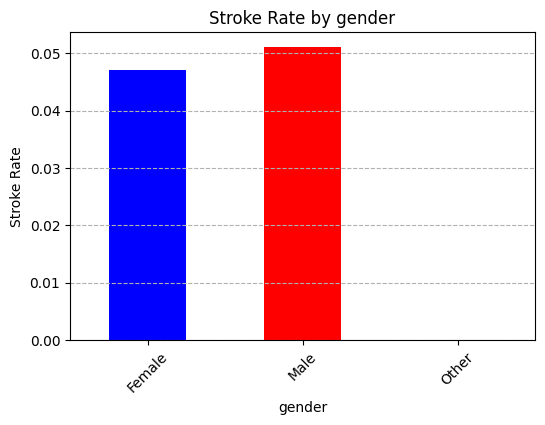

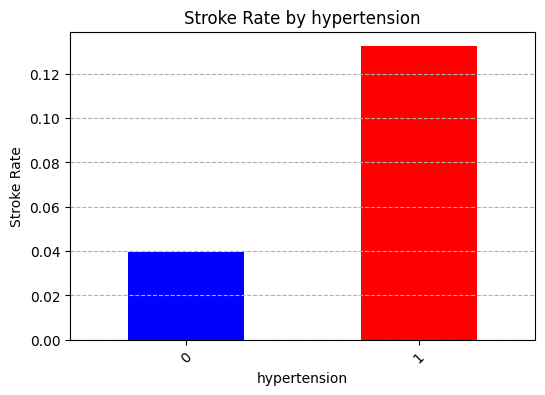

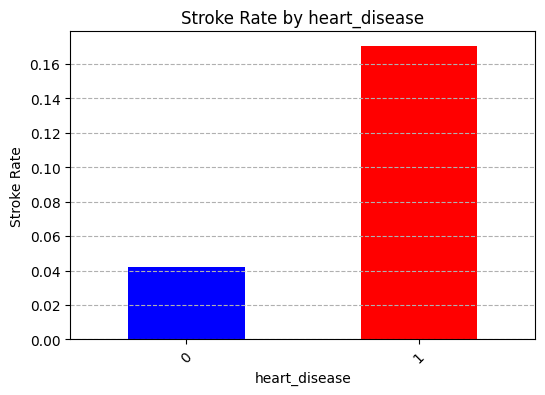

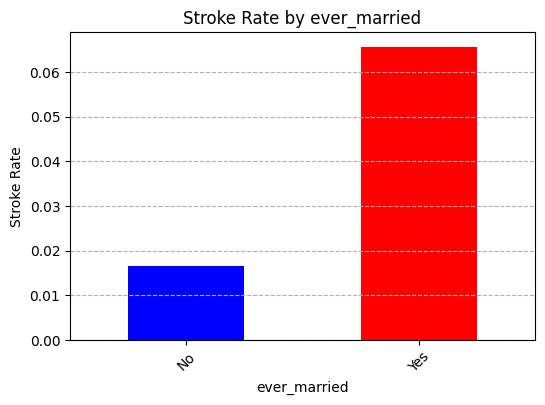

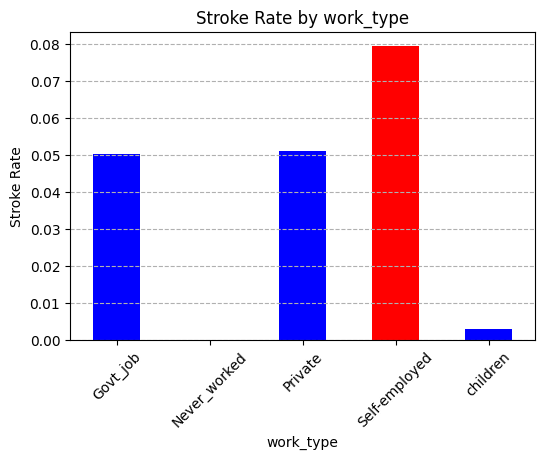

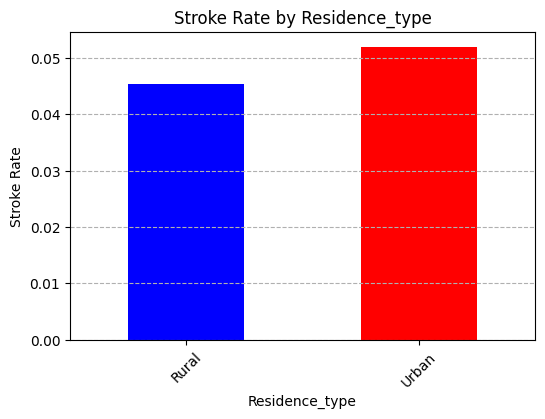

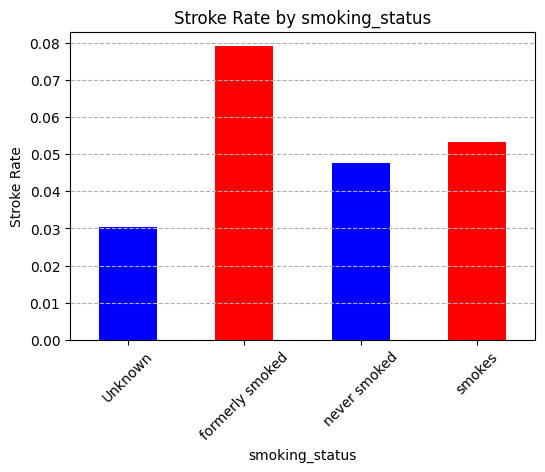

In [14]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical:
    plt.figure(figsize=(6,4))
    df_stroke.groupby(col)['stroke'].mean().plot(kind='bar', color=['blue', 'red'])
    plt.title(f'Stroke Rate by {col}')
    plt.ylabel('Stroke Rate')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.show()


# Feature scaling

In [15]:
# Standardizing continuous numerical features
continuous_columns = df_stroke.select_dtypes(include=['number']).columns.tolist()
continuous_columns.remove('stroke')  # Exclude the target variable

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_stroke[continuous_columns])

# Converting to a DataFrame
df_stroke_scaled = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

# Combining with the original dataset
scaled_data = pd.concat([df_stroke.drop(columns=continuous_columns), df_stroke_scaled], axis=1)

# one hot encoding 

In [16]:
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()


# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# Converting to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combining with the original dataset
prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

In [17]:
prepped_data.head()

,stroke,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1.051434,-0.328602,4.185032,2.706375,1.001234e+00,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,0.786070,-0.328602,-0.238947,2.121559,4.615554e-16,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,1.626390,-0.328602,4.185032,-0.005028,4.685773e-01,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.255342,-0.328602,-0.238947,1.437358,7.154182e-01,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,1.582163,3.043196,-0.238947,1.501184,-6.357112e-01,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# splitting the data into training and tesing 

In [18]:
X = prepped_data.drop('stroke', axis=1)
y = prepped_data['stroke']

In [19]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Apply SMOTE to oversample the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

#### ABC treats each possible set of hyperparameters as a solution (like a "food source"). It then evolves these solutions based on how well they perform (fitness), updating the values with the help of employed, onlooker, and scout bees.

We will have something like this 

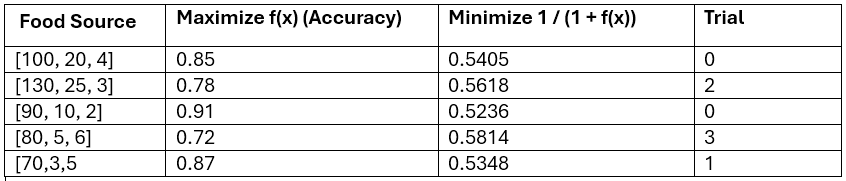

Each solution will be a vector like this [n_estimators, max_depth, min_samples_split]

we are going tp use the Accuracy of the random forest as our maximing function 

we will try to minimize the fit score as it is equal to 1/1+accuracy

# Modeling

We are going to choose a set of hyper paramters for the random forest

In [21]:
search_space = {
    "n_estimators": [10, 200],           # number of trees
    "max_depth": [2, 30],                # max depth of tree
    "min_samples_split": [2, 10],        # min number of samples to split
}

we are going to define a fitness function to :
* Build a RandomForestClassifier with those hyperparameters
* Evaluates it using cross-validation
* Returns the mean score

In [22]:
def fitness_function(params, X, y):
    # the paramter params is the list of hyperparamters
    # the parameter X is the features
    # the parameter y is the target variable
    n_estimators, max_depth, min_samples_split = map(int, params)#we convert the parameters in the list to int
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    
    score = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    return score.mean()

### Now we implement the ABC algorithm

* fitness_function: Evaluates the quality of a solution (accuracy of a Random Forest).
* bounds: Defines min and max for each hyperparameter.
* X, y: Features and labels of your dataset.
* num_bees: Total number of food sources = employed bees.
* max_iter: How long the search will run.
* imit: If a food source doesn't improve for limit times, it will be abandoned.

In [26]:
def abc_algorithm(fitness_function, bounds, X, y, num_bees=20, max_iter=50, limit=5):
    
    dim = len(bounds)
    
    # Initialize population
    population = np.random.uniform(  #population will hold all the initial solutions
        
        #Each element in bounds is a tuple bounds = [(min1, max1), (min2, max2), ..., (minN, maxN)]
        #This is list comprehension.
        #It loops through each tuple (low, high) in bounds
        # _ is commonly used as a placeholder for variables you want to ignore.It’s a convention that says: “I don’t care about this value.”
        #let's say bounds = [(10, 100), (1, 20), (2, 10)]
        #[low for low, _ in bounds] will give [10, 1, 2]
        # [high for _, high in bounds] will give [100, 20, 10]
        
        [low for low, _ in bounds], 
        [high for _, high in bounds], 
    
        size=(num_bees, dim)
    )
    
    fitness = np.array([fitness_function(ind, X, y) for ind in population])#This line evaluates the fitness of each solution (or food source) in the population and stores the results in a NumPy array.
    trial = np.zeros(num_bees)      #trial will hold the number of times a solution has not improved
    
    #save the best current solution
    best_index = np.argmax(fitness)
    best_solution = population[best_index].copy()
    best_fitness = fitness[best_index]
    accuracy_per_iteration = []  #List to store best fitness at each iteration

    for it in range(max_iter):
        # Employed Bee Phase
        for i in range(num_bees):
            k = np.random.choice([j for j in range(num_bees) if j != i])
            phi = np.random.uniform(-1, 1, dim)#This creates a random vector (same dimension as the solution) with values in the range [-1, 1]
            #mutation formula inspired by the ABC algorithm 
            #Think of it as this : the bee at position i modifies its current position based on the difference from another bee k
            new_solution = population[i] + phi * (population[i] - population[k])
            new_solution = np.clip(new_solution, [low for low, _ in bounds], [high for _, high in bounds])#Ensures new values stay within bounds.
            new_fitness = fitness_function(new_solution, X, y)
            
            if new_fitness > fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial[i] = 0
            else:
                trial[i] += 1
        
        # Onlooker Bee Phase
        prob = fitness / fitness.sum() #better food source have a higher propability of being chosen
        # Each onlooker bee selects a solution based on prob
        for _ in range(num_bees):
            if np.random.rand() < prob[i]:
                # We avoid choosing the same bee (i == k) because it would result in no change in the solution
                i = np.random.choice(num_bees, p=prob)
                k = np.random.choice([j for j in range(num_bees) if j != i])
                phi = np.random.uniform(-1, 1, dim)
                new_solution = population[i] + phi * (population[i] - population[k])
                new_solution = np.clip(new_solution, [low for low, _ in bounds], [high for _, high in bounds])
                new_fitness = fitness_function(new_solution, X, y)
                
                if new_fitness > fitness[i]:
                    population[i] = new_solution
                    fitness[i] = new_fitness
                    trial[i] = 0
                else:
                    trial[i] += 1
        
        # Scout Bee Phase
        for i in range(num_bees):
            if trial[i] > limit:
                population[i] = np.random.uniform(
                    [low for low, _ in bounds],
                    [high for _, high in bounds],
                )
                fitness[i] = fitness_function(population[i], X, y)
                trial[i] = 0
        
        # Update best
        current_best_index = np.argmax(fitness)
        if fitness[current_best_index] > best_fitness:
            best_fitness = fitness[current_best_index]
            best_solution = population[current_best_index].copy()
        accuracy_per_iteration.append(best_fitness)
        
        print(f"Iteration {it+1}/{max_iter}, Best Fitness: {best_fitness:.4f}")
        print(f"Trial vector: {trial}")
    
    return best_solution, best_fitness, accuracy_per_iteration

In [27]:
bounds = [
    (10, 200),   # n_estimators
    (2, 30),     # max_depth
    (2, 10),     # min_samples_split
]

best_params, best_score, acc_iter  = abc_algorithm(fitness_function, bounds, X_train, y_train)
print("Best Parameters (RF):", best_params.astype(int))
print("Best Accuracy:", best_score)

Iteration 1/50, Best Fitness: 0.9689
Trial vector: [1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.]
Iteration 2/50, Best Fitness: 0.9696
Trial vector: [2. 2. 0. 1. 0. 0. 1. 0. 2. 0. 0. 2. 1. 1. 0. 2. 0. 0. 2. 0.]
Iteration 3/50, Best Fitness: 0.9696
Trial vector: [3. 3. 1. 0. 1. 1. 1. 1. 3. 1. 0. 3. 0. 0. 0. 0. 1. 0. 3. 1.]
Iteration 4/50, Best Fitness: 0.9696
Trial vector: [0. 0. 2. 0. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 1. 1. 2. 2. 4. 0.]
Iteration 5/50, Best Fitness: 0.9696
Trial vector: [1. 1. 3. 0. 0. 0. 3. 4. 1. 0. 0. 0. 0. 0. 2. 2. 3. 0. 5. 0.]
Iteration 6/50, Best Fitness: 0.9696
Trial vector: [0. 0. 5. 1. 1. 0. 0. 5. 2. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1.]
Iteration 7/50, Best Fitness: 0.9696
Trial vector: [1. 0. 0. 2. 0. 1. 0. 0. 0. 2. 2. 0. 0. 2. 1. 1. 0. 2. 1. 2.]
Iteration 8/50, Best Fitness: 0.9696
Trial vector: [0. 0. 1. 3. 1. 0. 1. 1. 1. 3. 0. 0. 1. 0. 2. 0. 0. 3. 2. 3.]
Iteration 9/50, Best Fitness: 0.9698
Trial vector: [0. 1. 2. 4. 2. 0. 2. 0. 2. 0. 1. 0. 0. 1. 3.

Now we plot the accuracy through the iterations

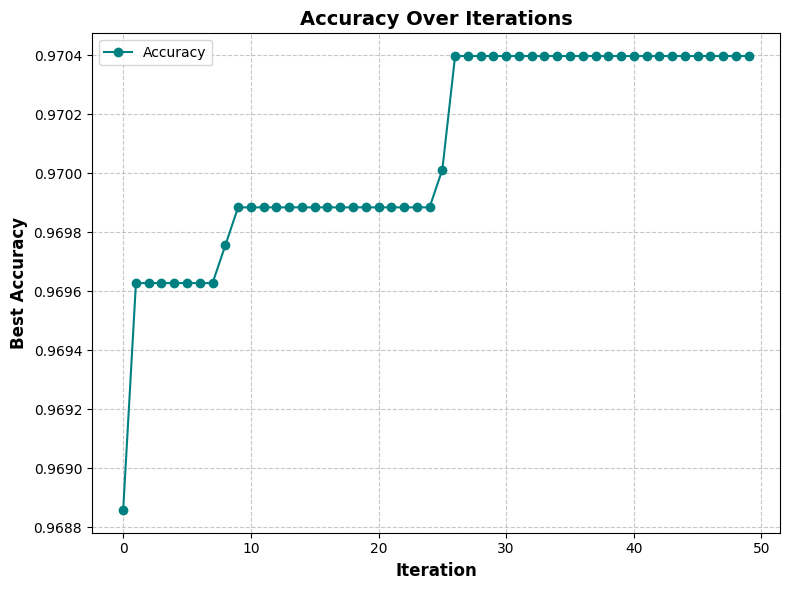

In [33]:
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.plot(acc_iter, marker='o', linestyle='-', color='teal', label="Accuracy")  # Add markers and customize color
plt.xlabel("Iteration", fontsize=12, fontweight='bold')  # Improve label font size and weight
plt.ylabel("Best Accuracy", fontsize=12, fontweight='bold')
plt.title("Accuracy Over Iterations", fontsize=14, fontweight='bold')  # Enhance title font size and weight
plt.grid(True, linestyle='--', alpha=0.7)  # Add a dashed grid with transparency
plt.xticks(fontsize=10)  # Customize x-axis tick font size
plt.yticks(fontsize=10)  # Customize y-axis tick font size
plt.legend(fontsize=10)  # Add a legend with a custom font size
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

We train the model using the best parameters

In [30]:
model = RandomForestClassifier(
    n_estimators=int(best_params[0]),
    max_depth=int(best_params[1]),
    min_samples_split=int(best_params[2]),
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Classification report 

In [34]:
report = classification_report(y_test, y_pred, target_names=["No Stroke", "Stroke"])
print(report)

              precision    recall  f1-score   support

   No Stroke       0.94      0.97      0.96       960
      Stroke       0.14      0.06      0.09        62

    accuracy                           0.92      1022
   macro avg       0.54      0.52      0.52      1022
weighted avg       0.89      0.92      0.91      1022



Confusion Matrix

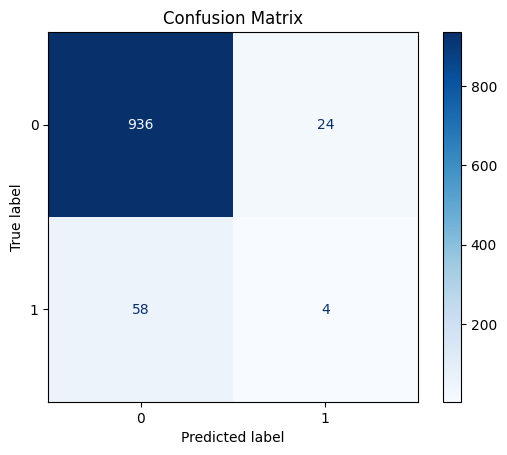

In [32]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()